<a href="https://colab.research.google.com/github/therealadolph/machine-learning/blob/main/zestai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.7/193.7 MB 6.6 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.impute import SimpleImputer

# For saving/loading models
import joblib

# For model explanation
import shap

# For plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

# Visualization settings
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("viridis")

# For warnings
import warnings
warnings.filterwarnings('ignore')

In [21]:
#Load the dataset
df = pd.read_csv('/content/sample_data/loan_approval_dataset.csv')

#Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [22]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433

In [23]:
#print("\nStatistical Summary:")
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [24]:
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [25]:
# Explore target variable distribution
print("\nTarget Variable Distribution:")
loan_status_counts = df[' loan_status'].value_counts()
print(loan_status_counts)
print(df[' loan_status'].value_counts(normalize=True).round(2))



Target Variable Distribution:
 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64
 loan_status
Approved    0.62
Rejected    0.38
Name: proportion, dtype: float64


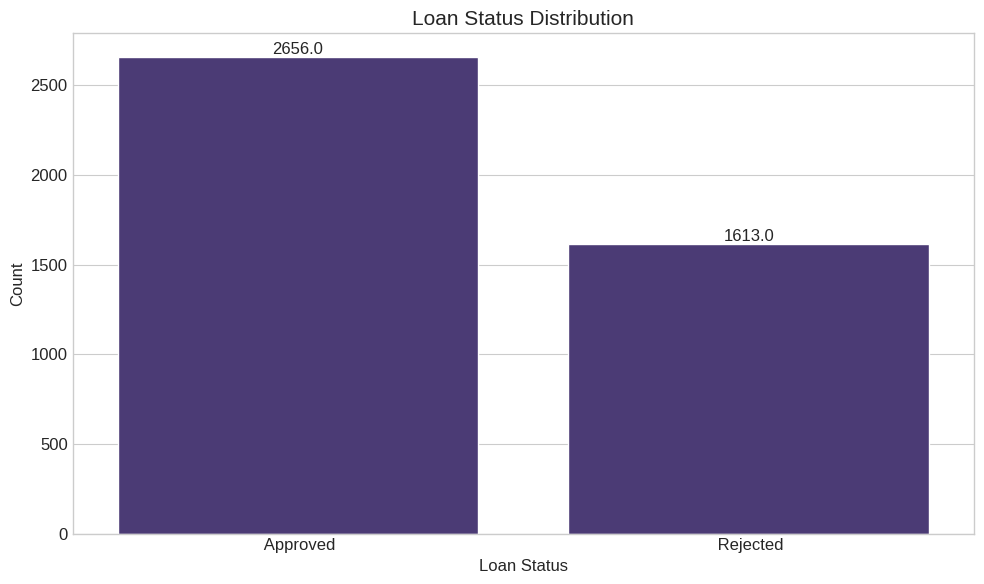

In [26]:
# Visualize target distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=' loan_status', data=df)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'bottom', fontsize=12)

plt.title('Loan Status Distribution', fontsize=15)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

In [36]:
# Make a copy to avoid changing original data
df_processed = df.copy()

# Extract loan_id for later reference (if it exists)
id_columns = ['loan_id'] if 'loan_id' in df_processed.columns else []
id_data = df_processed[id_columns] if id_columns else None
df_processed = df_processed.drop(id_columns, axis=1, errors='ignore')

# Define the correct column name (with space)
loan_status_col = ' loan_status' # Use a variable for clarity

# Convert target variable to binary if it's categorical
if loan_status_col in df_processed.columns and df_processed[loan_status_col].dtype == 'object':
    print("\nConverting loan_status to binary:")
    print(f"Before: {df_processed[loan_status_col].unique()}")

    # *** FIX: Add leading spaces to the keys in the map ***
    mapping_dict = {' Approved': 1, ' Rejected': 0}
    df_processed[loan_status_col] = df_processed[loan_status_col].map(mapping_dict)

    print(f"After: {df_processed[loan_status_col].unique()}")



Converting loan_status to binary:
Before: [' Approved' ' Rejected']
After: [1 0]


In [37]:
# Identify categorical and numerical columns
categorical_cols = df_processed.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target variable from numerical columns if it's there
if ' loan_status' in numerical_cols:
    numerical_cols.remove(' loan_status')

print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")


Categorical columns: [' education', ' self_employed']
Numerical columns: [' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']


In [38]:
print("\nPerforming Feature Engineering:")

# 1. Debt-to-Income ratio (if applicable columns exist)
if 'income' in df_processed.columns and 'debt' in df_processed.columns:
    df_processed['debt_to_income'] = df_processed['debt'] / df_processed['income']
    print("- Created debt_to_income ratio")
    numerical_cols.append('debt_to_income')

# 2. Credit utilization (if applicable columns exist)
if 'credit_card_balance' in df_processed.columns and 'credit_limit' in df_processed.columns:
    df_processed['credit_utilization'] = df_processed['credit_card_balance'] / df_processed['credit_limit']
    print("- Created credit_utilization ratio")
    numerical_cols.append('credit_utilization')

# 3. Has co-applicant (if applicable)
if 'coapplicant' in df_processed.columns:
    if df_processed['coapplicant'].dtype == 'object':
        df_processed['has_coapplicant'] = df_processed['coapplicant'].map({'Yes': 1, 'No': 0})
    print("- Created has_coapplicant feature")
    numerical_cols.append('has_coapplicant')

df_processed.head()


Performing Feature Engineering:


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


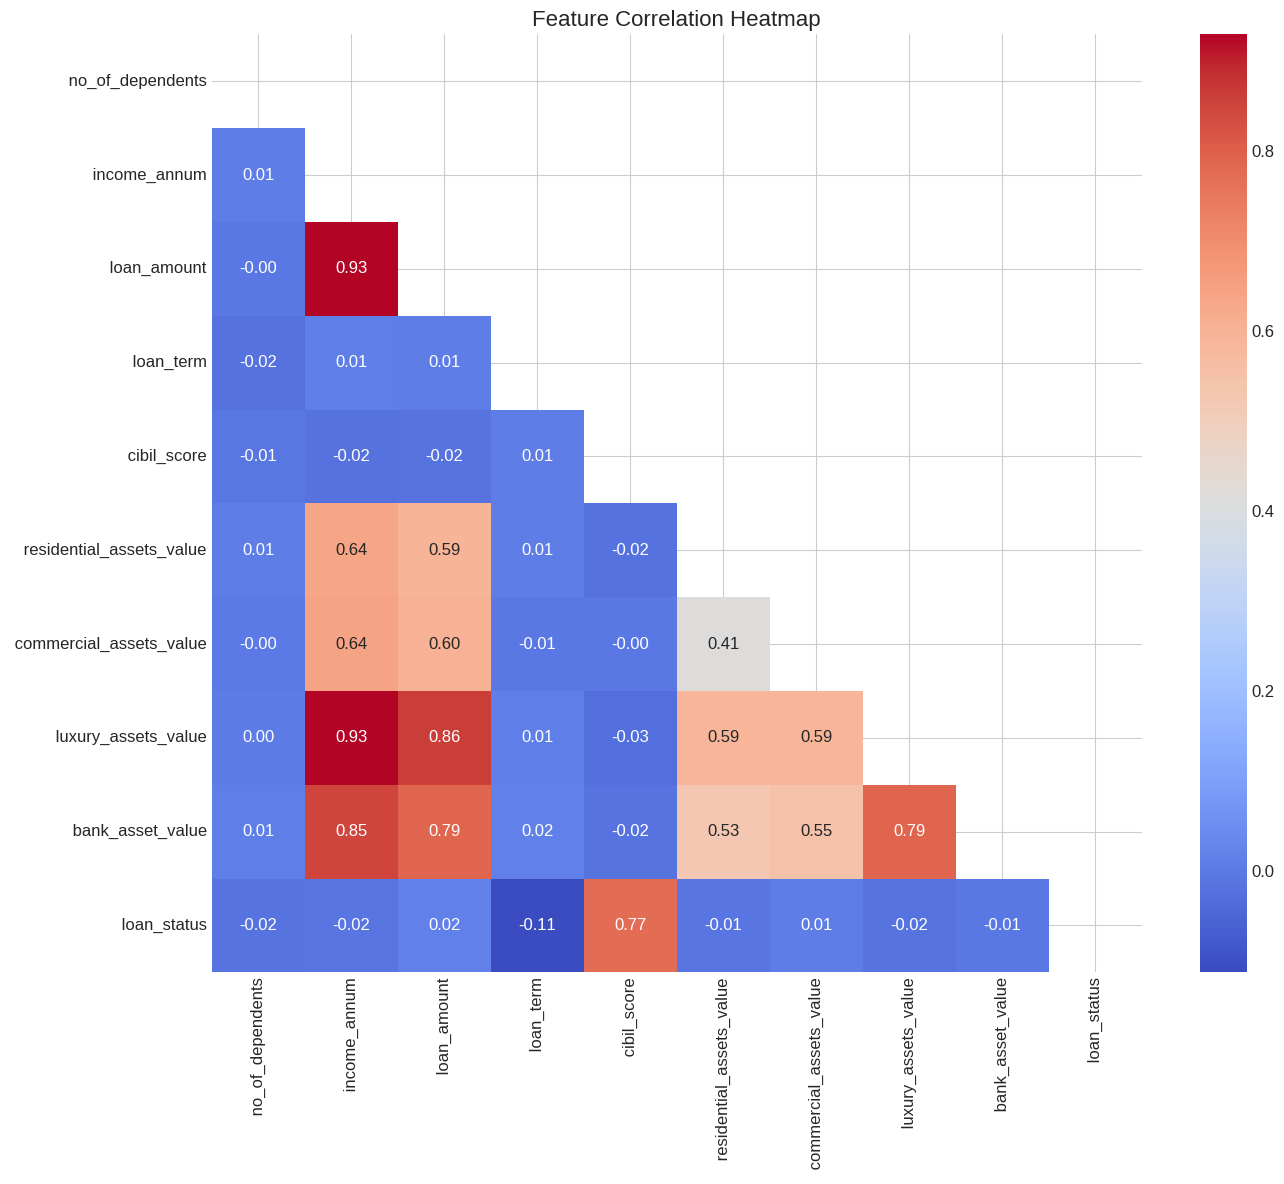

In [39]:
# Create a correlation heatmap for numerical features
plt.figure(figsize=(14, 12))
correlation = df_processed[numerical_cols + [' loan_status']].corr()
mask = np.triu(correlation)

# Plot the heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

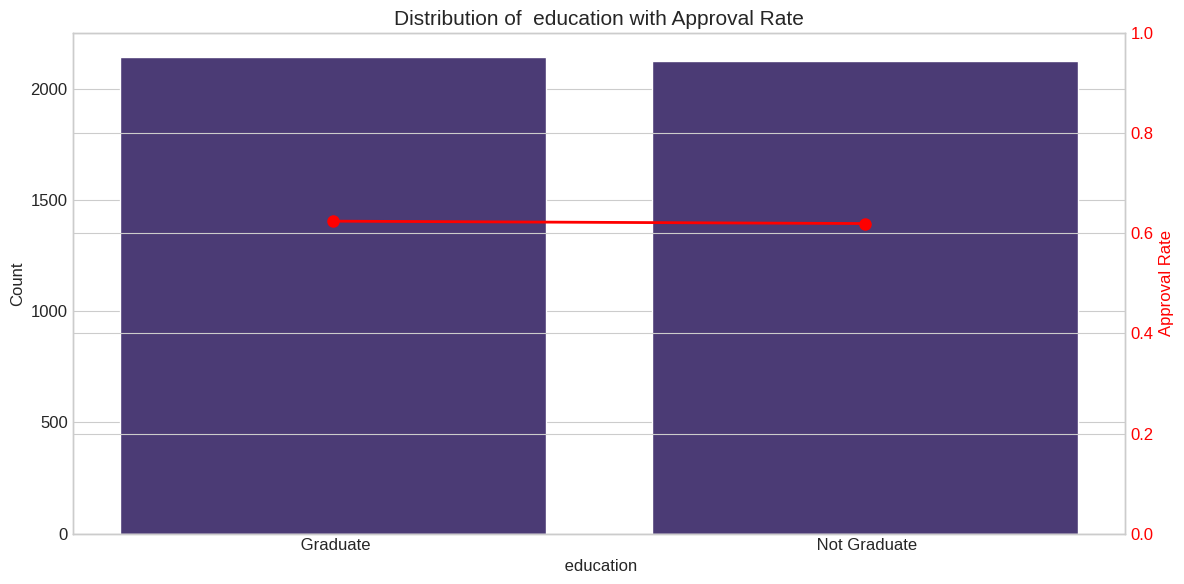

<Figure size 1000x600 with 0 Axes>

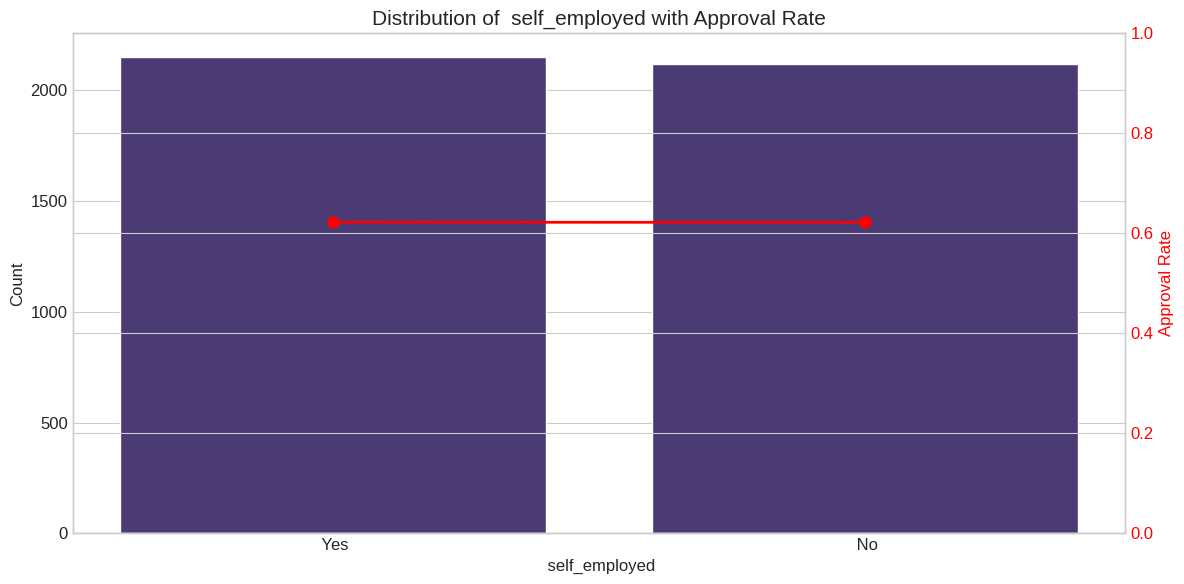

In [40]:
# Analyze categorical variables
for col in categorical_cols:
    plt.figure(figsize=(10, 6))

    # Count plot with target variable
    approval_rate = df_processed.groupby(col)[' loan_status'].mean().sort_values(ascending=False)
    count_data = df_processed[col].value_counts().reindex(approval_rate.index)

    # Create twin axes
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax2 = ax1.twinx()

    # Plot counts on primary axis
    sns.countplot(x=col, data=df_processed, order=approval_rate.index, ax=ax1)
    ax1.set_ylabel('Count', fontsize=12)

    # Plot approval rate on secondary axis
    ax2.plot(np.arange(len(approval_rate)), approval_rate.values, 'ro-', linewidth=2, markersize=8)
    ax2.set_ylabel('Approval Rate', color='r', fontsize=12)
    ax2.tick_params(axis='y', colors='r')
    ax2.set_ylim([0, 1])

    plt.title(f'Distribution of {col} with Approval Rate', fontsize=15)
    plt.tight_layout()
    plt.show()


In [41]:
# Split data into features and target
X = df_processed.drop(' loan_status', axis=1)
y = df_processed[' loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (3415, 11)
Testing set shape: (854, 11)


In [42]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Define the models to use
models = {
    'RandomForest': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
    ]),
    'LogisticRegression': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000))
    ]),
    'GradientBoosting': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ])
}


In [43]:
# Function to evaluate and compare models
def evaluate_model(model, name, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

    print(f"--- {name} Performance ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"CV ROC-AUC: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Rejected', 'Approved'],
                yticklabels=['Rejected', 'Approved'])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Classification Report
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.show()

    return {
        'model': model,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'cv_scores_mean': cv_scores.mean(),
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }



Evaluating RandomForest...
--- RandomForest Performance ---
Accuracy: 0.9824
ROC-AUC: 0.9987
CV ROC-AUC: 0.9958 (±0.0019)


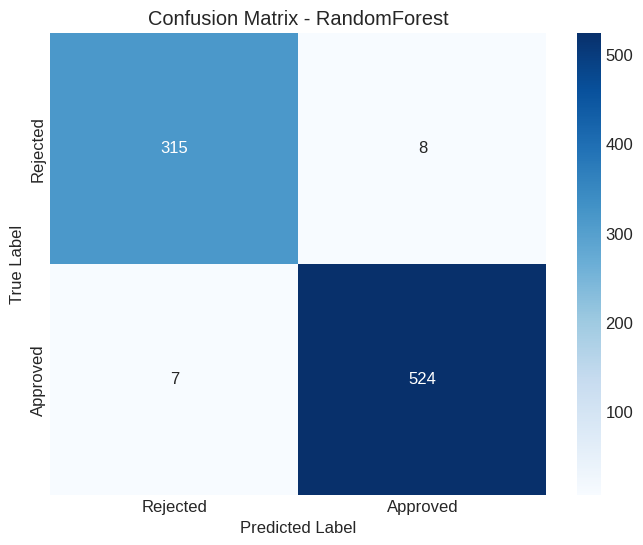


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       323
           1       0.98      0.99      0.99       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



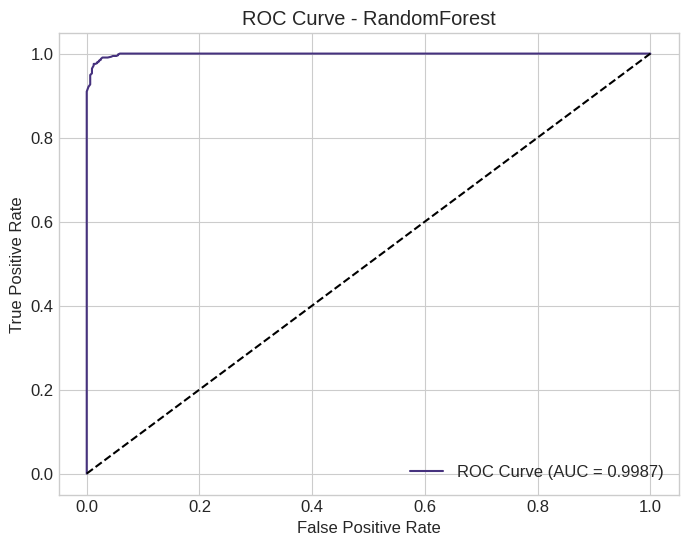


Evaluating LogisticRegression...
--- LogisticRegression Performance ---
Accuracy: 0.9239
ROC-AUC: 0.9734
CV ROC-AUC: 0.9667 (±0.0060)


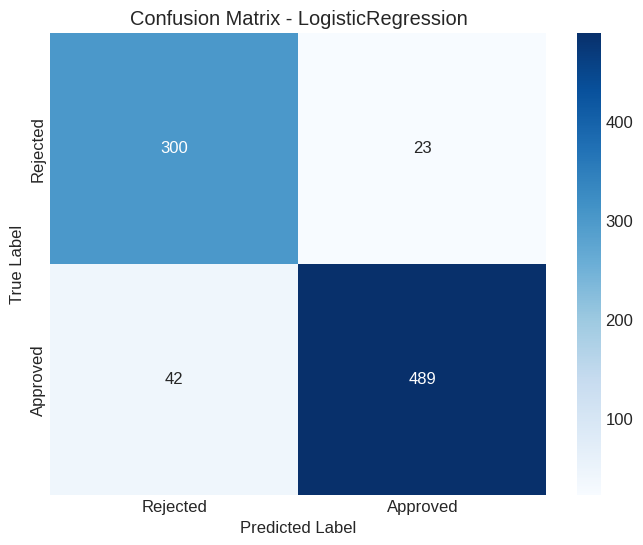


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       323
           1       0.96      0.92      0.94       531

    accuracy                           0.92       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.93      0.92      0.92       854



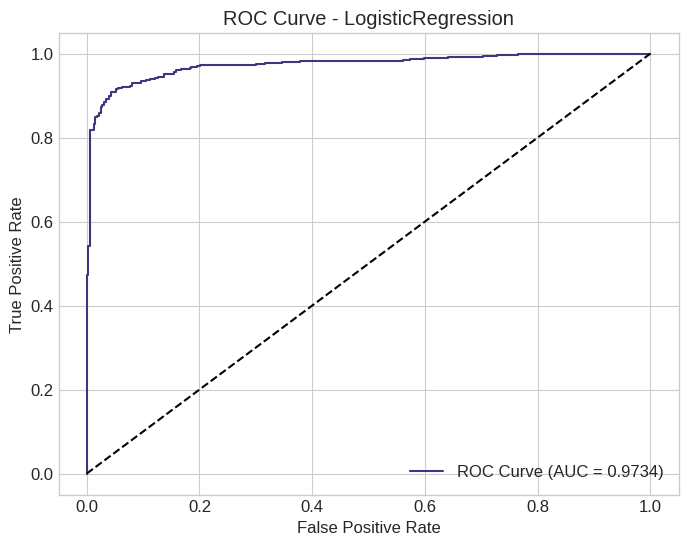


Evaluating GradientBoosting...
--- GradientBoosting Performance ---
Accuracy: 0.9824
ROC-AUC: 0.9976
CV ROC-AUC: 0.9975 (±0.0011)


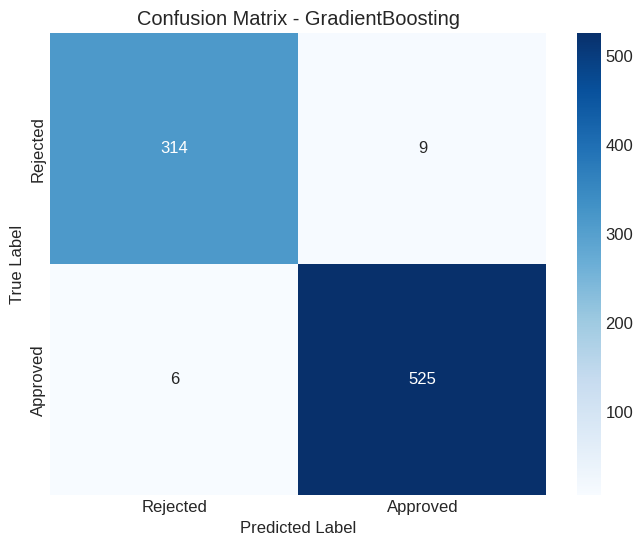


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       323
           1       0.98      0.99      0.99       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



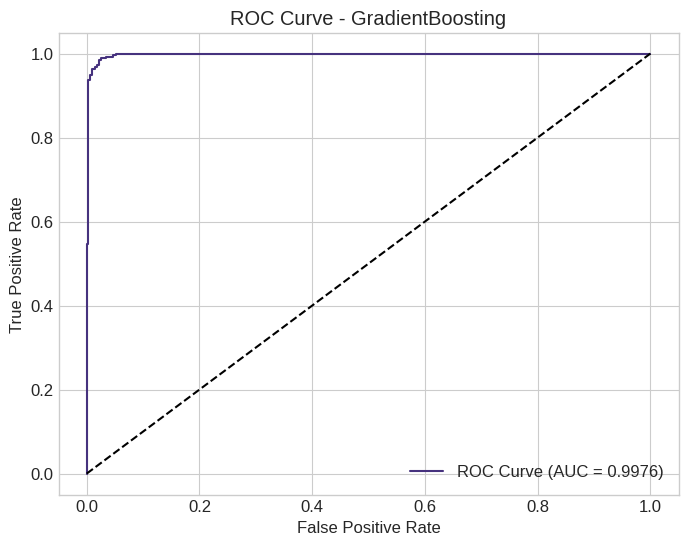

In [44]:
results = {}
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    results[name] = evaluate_model(model, name, X_train, X_test, y_train, y_test)


In [45]:
models_comparison = pd.DataFrame({
    'Accuracy': [results[m]['accuracy'] for m in results],
    'ROC-AUC': [results[m]['roc_auc'] for m in results],
    'CV ROC-AUC': [results[m]['cv_scores_mean'] for m in results]
}, index=results.keys())

print("Model Performance Comparison:")
models_comparison

Model Performance Comparison:


,Accuracy,ROC-AUC,CV ROC-AUC
RandomForest,0.982436,0.998744,0.995805
LogisticRegression,0.923888,0.973431,0.966672
GradientBoosting,0.982436,0.997557,0.997506


<Figure size 1200x600 with 0 Axes>

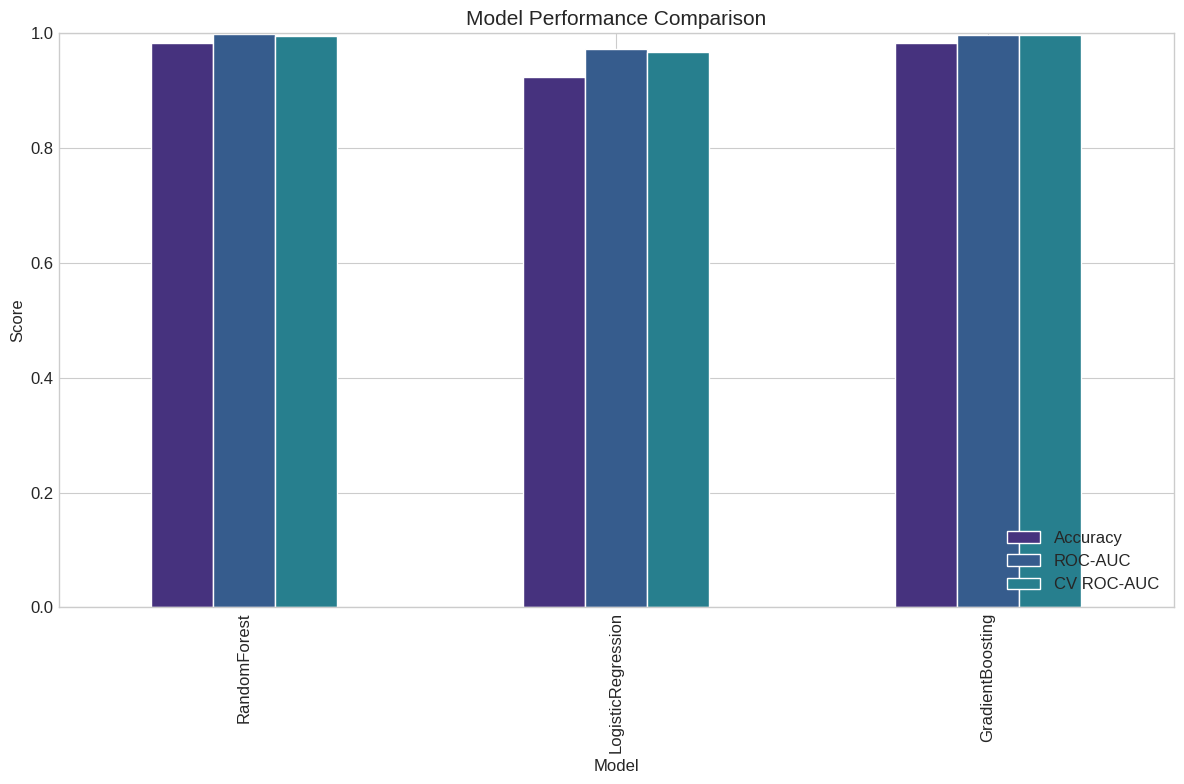

In [46]:
# Visualize model comparison
plt.figure(figsize=(12, 6))
models_comparison.plot(kind='bar')
plt.title('Model Performance Comparison', fontsize=15)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [47]:
best_model_name = models_comparison['ROC-AUC'].idxmax()
print(f"\nBest Model: {best_model_name} with ROC-AUC of {models_comparison.loc[best_model_name, 'ROC-AUC']:.4f}")





Best Model: RandomForest with ROC-AUC of 0.9987


In [48]:
# Define parameter grids for each model
param_grids = {
    'RandomForest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'LogisticRegression': {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__solver': ['liblinear', 'saga']
    },
    'GradientBoosting': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7]
    }
}

# Get the parameter grid for the best model
param_grid = param_grids.get(best_model_name, {})

print(f"Tuning hyperparameters for {best_model_name}...")
print(f"Parameter grid: {param_grid}")

# Create grid search
grid_search = GridSearchCV(
    models[best_model_name],
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Fit grid search
grid_search.fit(X_train, y_train)


Tuning hyperparameters for RandomForest...
Parameter grid: {'classifier__n_estimators': [50, 100, 200], 'classifier__max_depth': [None, 10, 20], 'classifier__min_samples_split': [2, 5, 10]}
Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         [' '
                                                                          'no_of_dependents',
                                                                          ' '
                                                                          'income_annum',
                                                                          ' '
                                                                          'loan_amount',
                                                                          ' '
                                                                          'loan_term',
                                                                          ' '
                                                                          'cibil_score',
                                                                          ' '
                                                                          'residential_assets_value',
                                                                          ' '
                                                                          'commercial_assets_value',
                                                                          ' '
                                                                          'luxury_assets_v...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         [' '
                                                                          'education',
                                                                          ' '
                                                                          'self_employed'])])),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='roc_auc', verbose=1)

In [50]:
# Best parameters
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best ROC-AUC score: {grid_search.best_score_:.4f}")

# Get best model
best_model = grid_search.best_estimator_


Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best ROC-AUC score: 0.9971


--- Tuned RandomForest Performance ---
Accuracy: 0.9824
ROC-AUC: 0.9986
CV ROC-AUC: 0.9971 (±0.0012)


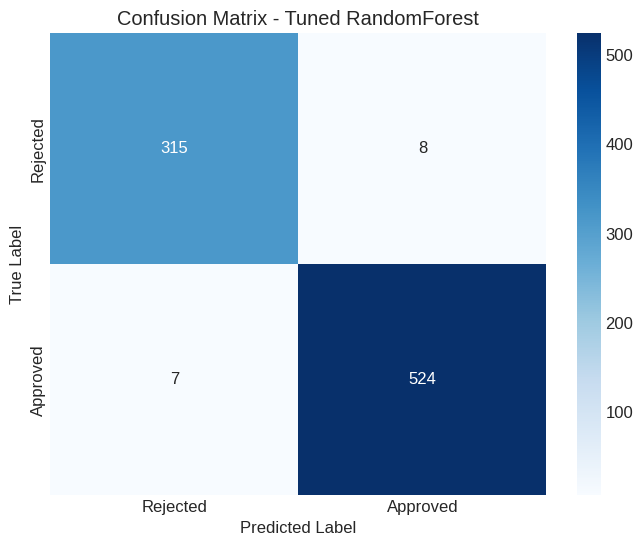


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       323
           1       0.98      0.99      0.99       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



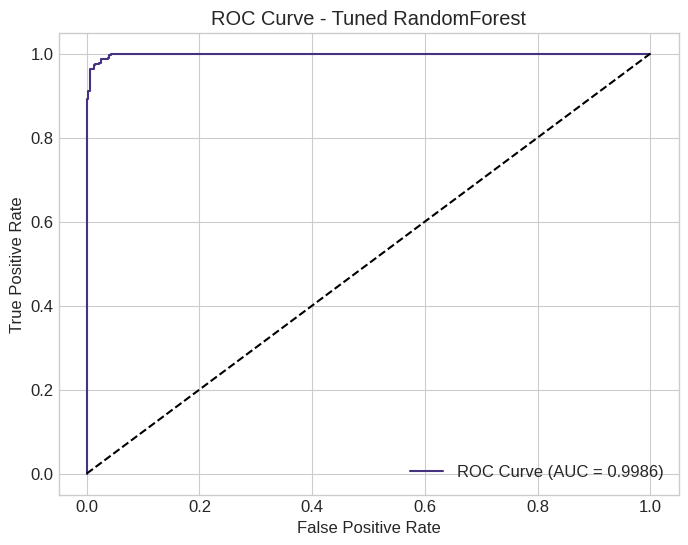

In [51]:
# Evaluate the tuned model
best_model_results = evaluate_model(best_model, f"Tuned {best_model_name}", X_train, X_test, y_train, y_test)

In [62]:
# Function to get feature names after preprocessing
def get_feature_names_after_preprocessing(preprocessor, X_train, categorical_cols, numerical_cols):
    # Get one-hot encoder feature names
    if categorical_cols:
        cat_idx = [i for i, (name, _) in enumerate(preprocessor.transformers_) if name == 'cat'][0]
        if hasattr(preprocessor.transformers_[cat_idx][1].named_steps['onehot'], 'get_feature_names_out'):
            cat_features = preprocessor.transformers_[cat_idx][1].named_steps['onehot'].get_feature_names_out(categorical_cols)
        else:
            cat_features = []
    else:
        cat_features = []

    # Combine with numerical feature names
    feature_names = np.append(numerical_cols, cat_features).tolist()
    return feature_names


In [64]:
def get_feature_names_after_preprocessing(preprocessor, X_train, categorical_cols, numerical_cols):
    """
    Gets feature names after preprocessing with ColumnTransformer.

    Handles cases where 'remainder' or drop indices were used in ColumnTransformer.
    """
    feature_names = []

    for i, (name, transformer, features) in enumerate(preprocessor.transformers_):
        # Handle numerical features
        if name == 'num':
            feature_names.extend(features)  # Numerical features are passed directly

        # Handle categorical features
        elif name == 'cat':
            if hasattr(transformer.named_steps['onehot'], 'get_feature_names_out'):
                cat_features = transformer.named_steps['onehot'].get_feature_names_out(categorical_cols)
                feature_names.extend(cat_features)

    return feature_names

In [65]:
# Extract feature importance from the best model (if supported)
if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    # Extract feature importances
    feature_importances = best_model.named_steps['classifier'].feature_importances_

    # Get feature names after preprocessing
    feature_names = get_feature_names_after_preprocessing(best_model.named_steps['preprocessor'],
                                                       X_train, categorical_cols, numerical_cols)

    # Create feature importance DataFrame
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values('Importance', ascending=False)

    print("Top 20 Most Important Features:")
    feature_importance_df.head(20)


Top 20 Most Important Features:


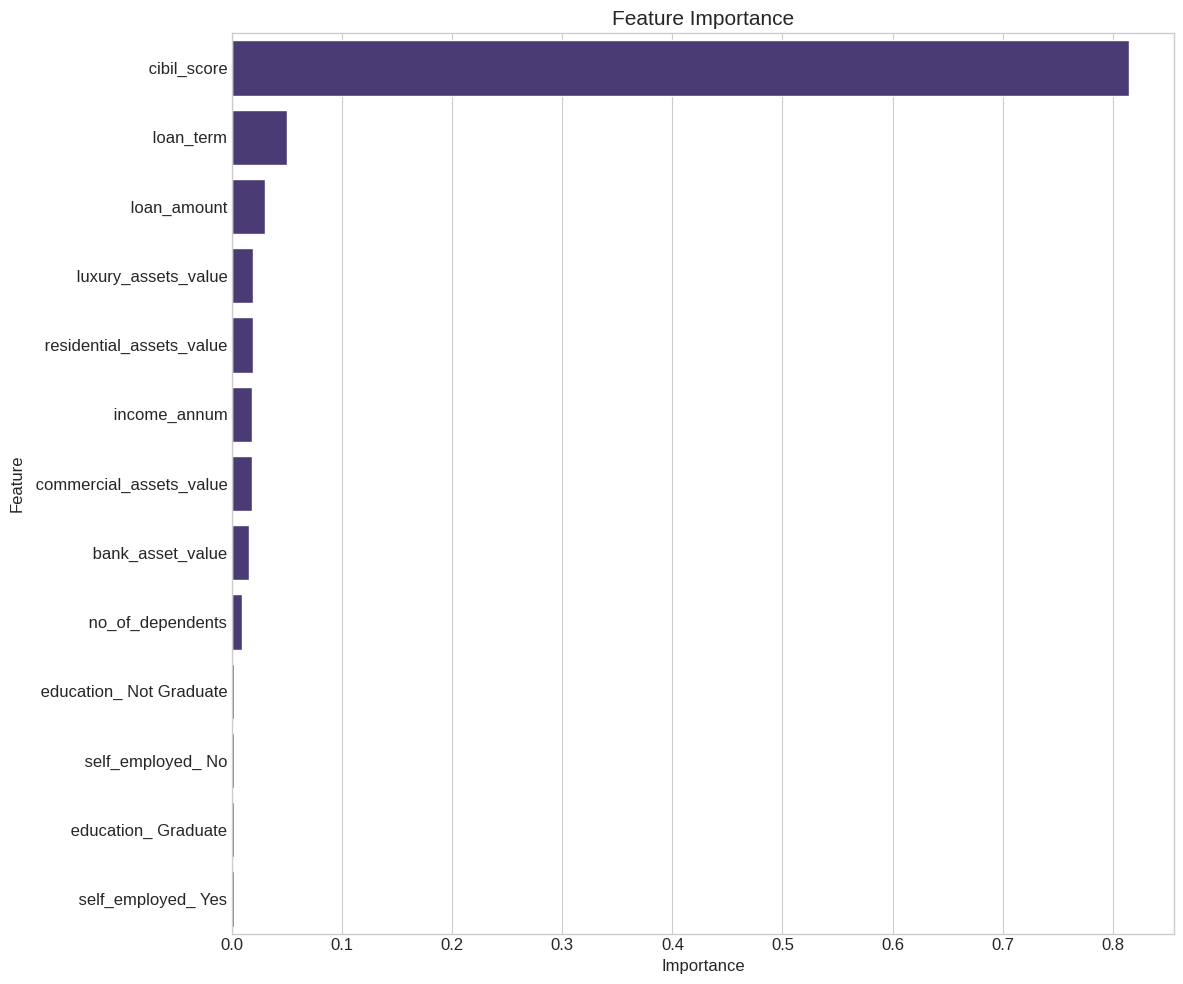

In [66]:
# Plot feature importance
if 'feature_importance_df' in locals():
    plt.figure(figsize=(12, 10))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
    plt.title('Feature Importance', fontsize=15)
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.tight_layout()
    plt.show()

SHAP Summary Plot:


<Figure size 1200x800 with 0 Axes>

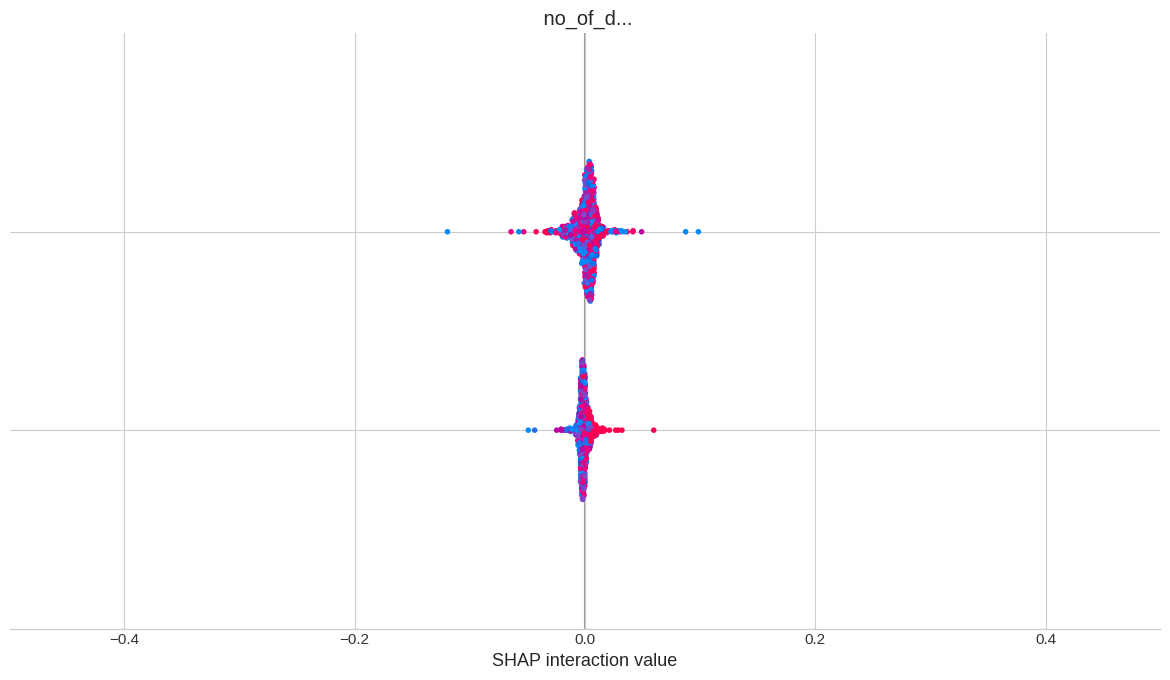


SHAP Force Plot for First Prediction:


Error in SHAP analysis: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).
Skipping SHAP analysis.


In [67]:
# Perform SHAP analysis if possible
try:
    # For tree-based models
    if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
        # Get preprocessed data
        X_test_processed = best_model.named_steps['preprocessor'].transform(X_test)

        # Create explainer
        explainer = shap.TreeExplainer(best_model.named_steps['classifier'])

        # Calculate SHAP values
        shap_values = explainer.shap_values(X_test_processed)

        # Get feature names
        feature_names = get_feature_names_after_preprocessing(best_model.named_steps['preprocessor'],
                                                          X_train, categorical_cols, numerical_cols)

        # Summary plot
        print("SHAP Summary Plot:")
        shap.summary_plot(shap_values[1] if isinstance(shap_values, list) else shap_values,
                         X_test_processed, feature_names=feature_names)

        # Force plot for first prediction
        print("\nSHAP Force Plot for First Prediction:")
        shap.initjs()
        shap.force_plot(explainer.expected_value[1] if hasattr(explainer, 'expected_value') and isinstance(explainer.expected_value, list)
                      else explainer.expected_value,
                     shap_values[1][0] if isinstance(shap_values, list) else shap_values[0],
                     feature_names=feature_names)

    else:
        print("SHAP analysis is only supported for tree-based models in this notebook.")
except Exception as e:
    print(f"Error in SHAP analysis: {e}")
    print("Skipping SHAP analysis.")


In [68]:
# Save the model
model_filename = "lending_intelligence_model.pkl"
joblib.dump(best_model, model_filename)
print(f"Model saved to {model_filename}")

Model saved to lending_intelligence_model.pkl


In [69]:
# Create a prediction function for new data
def predict_loan_approval(model, input_data):
    """
    Function to make predictions on new data

    Parameters:
    model: Trained model
    input_data: Dictionary or DataFrame with applicant information

    Returns:
    Dictionary with prediction results
    """
    # Ensure input_data has the right format
    if isinstance(input_data, dict):
        input_df = pd.DataFrame([input_data])
    elif isinstance(input_data, pd.DataFrame):
        input_df = input_data
    else:
        raise ValueError("Input data must be a dictionary or pandas DataFrame")

    # Make prediction
    prediction_proba = model.predict_proba(input_df)[0, 1]
    prediction = model.predict(input_df)[0]

    result = {
        'loan_approved': bool(prediction),
        'approval_probability': float(prediction_proba),
        'risk_score': int((1 - prediction_proba) * 100)  # Convert to risk score out of 100
    }

    return result

In [70]:
# Test the prediction function with a sample from the test set
sample_applicant = X_test.iloc[0].to_dict()
print("Sample applicant data:")
for key, value in sample_applicant.items():
    print(f"{key}: {value}")

prediction_result = predict_loan_approval(best_model, sample_applicant)
print("\nPrediction result:")
for key, value in prediction_result.items():
    print(f"{key}: {value}")

# ## 10. Conclusion and Next Steps

# In[29]:

print("# Conclusion")
print("We've successfully built a lending intelligence model that can predict loan approvals with good accuracy.")
print(f"Our best model ({best_model_name}) achieved:")
print(f"- Accuracy: {best_model_results['accuracy']:.4f}")
print(f"- ROC-AUC: {best_model_results['roc_auc']:.4f}")

print("\n# Key Insights")
if 'feature_importance_df' in locals():
    top_features = feature_importance_df.head(5)['Feature'].tolist()
    print(f"The top 5 most important features for loan approval prediction are: {', '.join(top_features)}")

print("\n# Next Steps")
print("1. Gather more data to improve model performance")
print("2. Implement the model in a production environment")
print("3. Set up monitoring to track model performance over time")
print("4. Consider adding more advanced features or ensembling multiple models")
print("5. Develop a simple API or web interface for using the model")

Sample applicant data:
 no_of_dependents: 3
 education:  Not Graduate
 self_employed:  Yes
 income_annum: 8300000
 loan_amount: 31400000
 loan_term: 6
 cibil_score: 674
 residential_assets_value: 1000000
 commercial_assets_value: 1600000
 luxury_assets_value: 17200000
 bank_asset_value: 6100000

Prediction result:
loan_approved: True
approval_probability: 0.9258327760096029
risk_score: 7
# Conclusion
We've successfully built a lending intelligence model that can predict loan approvals with good accuracy.
Our best model (RandomForest) achieved:
- Accuracy: 0.9824
- ROC-AUC: 0.9986

# Key Insights
The top 5 most important features for loan approval prediction are:  cibil_score,  loan_term,  loan_amount,  luxury_assets_value,  residential_assets_value

# Next Steps
1. Gather more data to improve model performance
2. Implement the model in a production environment
3. Set up monitoring to track model performance over time
4. Consider adding more advanced features or ensembling multiple mode